In [1]:
import pandas as pd
import numpy as np
################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Impoprt Data 

In [2]:
c_pp = pd.read_excel(r'C:\Users\SAKET\Desktop\python\Machine Learning\Linear Regression\Car Price Prediction.xlsx')
c_pp

,Priceinthousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255
...,...,...,...,...,...,...,...,...,...,...
151,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,18.061
152,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,18.061
153,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,18.061
154,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,18.061


## Check Data type

In [3]:
c_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Priceinthousands  156 non-null    float64
 1   Engine_size       156 non-null    float64
 2   Horsepower        156 non-null    int64  
 3   Wheelbase         156 non-null    float64
 4   Width             156 non-null    float64
 5   Length            156 non-null    float64
 6   Curb_weight       156 non-null    float64
 7   Fuel_capacity     156 non-null    float64
 8   Fuel_efficiency   156 non-null    int64  
 9   Resale            156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


In [4]:
c_pp.describe()

,Priceinthousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,27.439532,3.060897,185.948718,107.487179,71.150000,187.343590,3.381949,17.951923,23.878205,18.060808
std,14.318249,1.044653,56.700321,7.641303,3.451872,13.431754,0.630372,3.887921,4.296049,10.076940
min,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,5.160000
25%,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,12.527500
50%,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,17.617500
75%,32.253750,3.575000,215.000000,112.200000,73.425000,196.125000,3.821500,19.575000,26.000000,18.080750
max,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,67.550000


## Check outliers 

<AxesSubplot:>

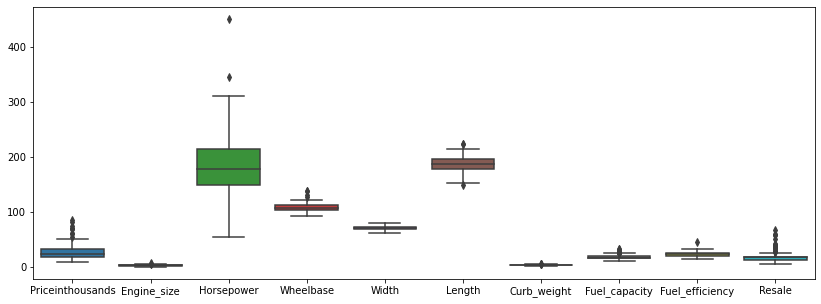

In [5]:
plt.rcParams["figure.figsize"] = [14,5]
sns.boxplot(data=c_pp)

In [6]:
def outlier_treatment(c_pp):
    for s in c_pp.columns:    
        q1=c_pp[s].quantile(0.25)
        q3=c_pp[s].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((c_pp[s].dtype=='int64') | (c_pp[s].dtype=='float64')):
            c_pp[s][c_pp[s]<= lower_limit] = lower_limit
            c_pp[s][c_pp[s]>= upper_limit] = upper_limit
        else:
            c_pp[s]=c_pp[s]
    return c_pp
outlier_treatment(c_pp)

C:\Users\SAKET\AppData\Local\Temp/ipykernel_8184/1225065818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_pp[s][c_pp[s]<= lower_limit] = lower_limit
C:\Users\SAKET\AppData\Local\Temp/ipykernel_8184/1225065818.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_pp[s][c_pp[s]>= upper_limit] = upper_limit
C:\Users\SAKET\AppData\Local\Temp/ipykernel_8184/1225065818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_pp[s][c_pp

,Priceinthousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,19.875000
2,35.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,18.225000
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,26.410625
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,22.255000
...,...,...,...,...,...,...,...,...,...,...
151,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,18.061000
152,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,18.061000
153,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,18.061000
154,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,18.061000


<AxesSubplot:>

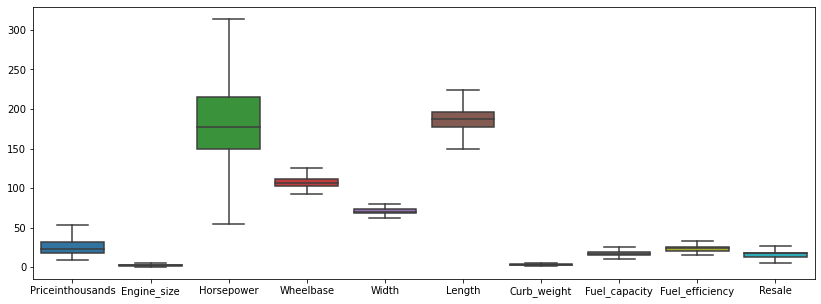

In [7]:
sns.boxplot(data=c_pp)

## Data Partition

In [8]:
X=c_pp.drop('Priceinthousands',axis=1)
y=c_pp[['Priceinthousands']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=45)

In [10]:
df=pd.concat([X_train, y_train],axis=1)
df

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Priceinthousands
114,2.0,132.0,108.0,71.0,186.3,2.94200,16.0000,27.0,9.800000,16.0800
21,3.1,175.0,107.5,72.5,200.9,3.33000,16.6000,25.0,10.310000,18.8900
61,1.5,92.0,96.1,65.7,166.7,2.24000,11.9000,31.0,5.860000,9.6990
72,4.0,290.0,112.2,72.0,196.7,3.89000,22.5000,22.0,26.410625,53.5125
143,4.7,230.0,112.2,76.4,192.5,5.09425,25.2375,15.0,26.410625,51.7280
...,...,...,...,...,...,...,...,...,...,...
68,4.0,195.0,105.9,72.3,181.5,3.88000,20.5000,19.0,18.810000,26.8950
95,2.3,190.0,94.5,67.5,157.9,3.05500,15.9000,26.0,18.061000,38.9000
32,3.5,253.0,113.0,74.4,207.7,3.56400,17.0000,23.0,17.325000,28.3400
124,3.4,300.0,92.6,69.5,174.5,3.03200,17.0000,21.0,26.410625,53.5125


## Correlation matrix

In [11]:
df.corr()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Priceinthousands
Engine_size,1.000000,0.817690,0.564239,0.746389,0.609502,0.815189,0.713762,-0.731824,0.483576,0.612444
Horsepower,0.817690,1.000000,0.388229,0.600201,0.430353,0.682717,0.577688,-0.596380,0.696171,0.864250
Wheelbase,0.564239,0.388229,1.000000,0.694562,0.835352,0.663962,0.698690,-0.562101,0.182316,0.237570
Width,0.746389,0.600201,0.694562,1.000000,0.721925,0.733126,0.632748,-0.582370,0.283012,0.403972
Length,0.609502,0.430353,0.835352,0.721925,1.000000,0.633331,0.598606,-0.453022,0.142597,0.185610
Curb_weight,0.815189,0.682717,0.663962,0.733126,0.633331,1.000000,0.879568,-0.842097,0.518758,0.632997
Fuel_capacity,0.713762,0.577688,0.698690,0.632748,0.598606,0.879568,1.000000,-0.824787,0.449720,0.542278
Fuel_efficiency,-0.731824,-0.596380,-0.562101,-0.582370,-0.453022,-0.842097,-0.824787,1.000000,-0.416770,-0.535248
Resale,0.483576,0.696171,0.182316,0.283012,0.142597,0.518758,0.449720,-0.416770,1.000000,0.794820
Priceinthousands,0.612444,0.864250,0.237570,0.403972,0.185610,0.632997,0.542278,-0.535248,0.794820,1.000000


<AxesSubplot:>

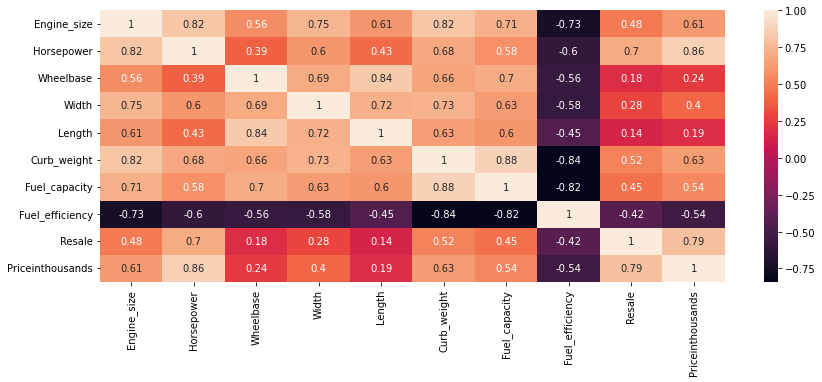

In [12]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='Horsepower', ylabel='Priceinthousands'>

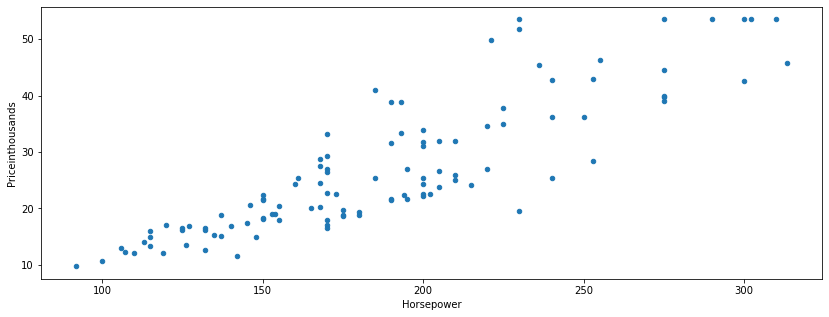

In [13]:
df.plot.scatter(x='Horsepower',y='Priceinthousands')

* Horsepower have high impact on price
* Horsepower have 82% strong corelation with price

## Multicolinearity with VIF

In [14]:
X1=df.drop(['Priceinthousands'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Engine_size          68.224071
Horsepower           69.446148
Wheelbase          1090.357706
Width               929.447656
Length              892.235469
Curb_weight         272.615071
Fuel_capacity       158.412817
Fuel_efficiency     131.973817
Resale               26.236656
dtype: float64

## Model Building

* Ho : There is linear relationship between price in thousands and other independent variables
    vs
* H1 : There is no linear relationship between price in thousands and other independent variables

In [15]:
df.columns

Index(['Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Resale',
       'Priceinthousands'],
      dtype='object')

In [16]:
import statsmodels.formula.api as smf
model=smf.ols('Priceinthousands ~ Engine_size + Horsepower + Wheelbase + Width + Length + Curb_weight + Fuel_capacity+ Fuel_efficiency + Resale',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Priceinthousands   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     84.28
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.18e-42
Time:                        14:47:13   Log-Likelihood:                -304.05
No. Observations:                 109   AIC:                             628.1
Df Residuals:                      99   BIC:                             655.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.6208     13.653      0.485      0.629     -20.471      33.712
Engine_size        -3.6230      1.013     -3.576      0.001      -5.633      -1.613
Horsepower          0.1925      0.017     11.280      0.000       0.159       0.226
Wheelbase           0.0932      0.123      0.756      0.451      -0.151       0.338
Width              -0.1607      0.217     -0.739      0.462      -0.592       0.271
Length             -0.2516      0.063     -3.988      0.000      -0.377      -0.126
Curb_weight         7.2770      1.878      3.874      0.000       3.550      11.004
Fuel_capacity       0.2824      0.274      1.029      0.306      -0.262       0.827
Fuel_efficiency     0.3145      0.217      1.447      0.151      -0.117       0.746
Resale              0.4312      0.120      3.598      0.001       0.193       0.669
==============================================================================
Omnibus:                        1.877   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.372
Skew:                           0.132   Prob(JB):                        0.504
Kurtosis:                       3.482   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Engine_size, Horsepower, Length, Curb_weight, Resale  has linear relationship with respect to PM10
* Wheelbase, Width, Fuel_capacity, Fuel_effeciency  do not have linear relationship with respect to PM10,
  so we will remove them and rerun the model
* 88% is the accuracy of the model.

In [28]:
model2=smf.ols('Priceinthousands ~ Engine_size+ Horsepower + Length + Curb_weight + Resale',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Priceinthousands   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           7.43e-46
Time:                        14:51:14   Log-Likelihood:                -305.95
No. Observations:                 109   AIC:                             623.9
Df Residuals:                     103   BIC:                             640.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.6275      6.634      1.753      0.083      -1.529      24.784
Engine_size    -4.0366      0.968     -4.169      0.000      -5.957      -2.116
Horsepower      0.1881      0.017     11.220      0.000       0.155       0.221
Length         -0.2080      0.042     -5.010      0.000      -0.290      -0.126
Curb_weight     7.0382      1.235      5.698      0.000       4.589       9.488
Resale          0.4776      0.116      4.108      0.000       0.247       0.708
==============================================================================
Omnibus:                        2.838   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.236
Skew:                           0.273   Prob(JB):                        0.327
Kurtosis:                       3.441   Cond. No.                     4.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multicolinearity with VIF 

In [30]:
X=df.loc[:,['Engine_size','Horsepower','Length','Curb_weight', 'Resale']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Engine_size          68.224071
Horsepower           69.446148
Wheelbase          1090.357706
Width               929.447656
Length              892.235469
Curb_weight         272.615071
Fuel_capacity       158.412817
Fuel_efficiency     131.973817
Resale               26.236656
dtype: float64

In [31]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Priceinthousands,fitted_value,residual
114,2.0,132.0,108.0,71.0,186.3,2.94200,16.0000,27.0,9.800000,16.0800,15.021544,1.058456
21,3.1,175.0,107.5,72.5,200.9,3.33000,16.6000,25.0,10.310000,18.8900,18.606817,0.283183
61,1.5,92.0,96.1,65.7,166.7,2.24000,11.9000,31.0,5.860000,9.6990,6.770273,2.928727
72,4.0,290.0,112.2,72.0,196.7,3.89000,22.5000,22.0,26.410625,53.5125,49.108412,4.404088
143,4.7,230.0,112.2,76.4,192.5,5.09425,25.2375,15.0,26.410625,51.7280,44.347001,7.380999


# Linearity 

<AxesSubplot:xlabel='Horsepower', ylabel='Priceinthousands'>

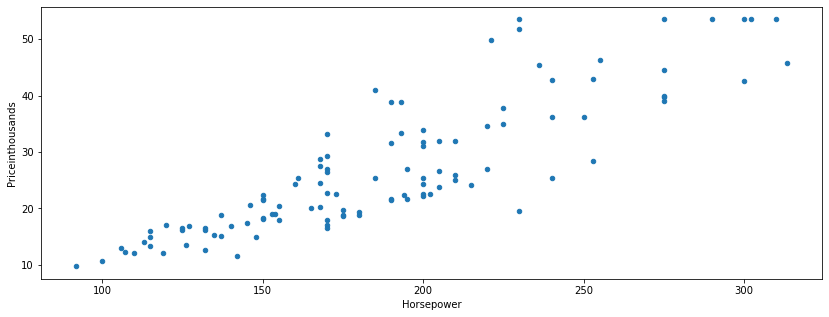

In [40]:
df.plot.scatter(x='Horsepower', y = 'Priceinthousands')

## Homoscedasity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

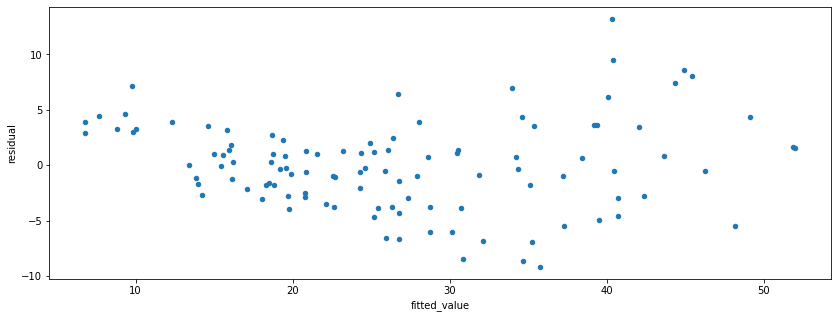

In [33]:
df.plot.scatter(x='fitted_value', y = 'residual')

## Normality

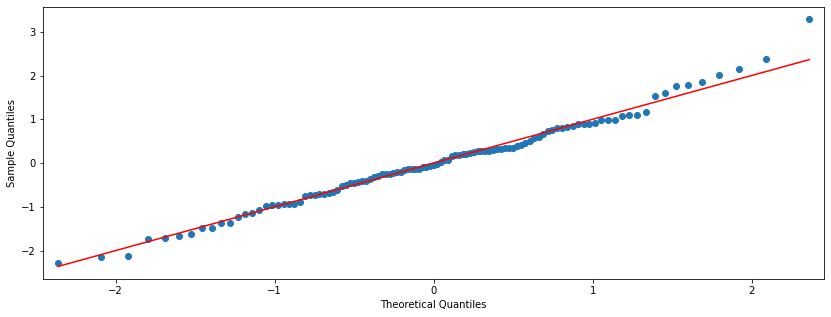

In [34]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model error are IID 

<AxesSubplot:ylabel='Frequency'>

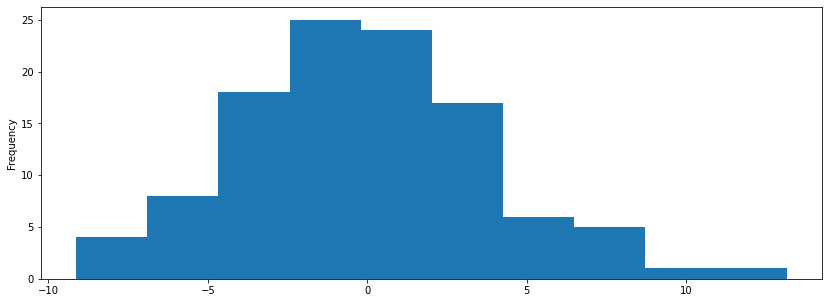

In [35]:
df['residual'].plot.hist()

## Predictions on test data unseen data

In [36]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Priceinthousands
0,1.8000,140.00,101.2,67.3,172.4,2.639,13.2000,28.0,16.360000,21.5000
40,3.9000,175.00,109.6,78.8,192.6,4.245,25.2375,15.0,15.510000,21.3150
38,5.4875,313.25,96.2,75.7,176.7,3.375,19.0000,16.0,26.410625,53.5125
3,3.5000,210.00,114.6,71.4,196.6,3.850,18.0000,22.0,26.410625,42.0000
64,3.0000,227.00,108.3,70.2,193.7,3.342,18.5000,25.0,19.690000,29.4650


In [37]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale,Priceinthousands,Prediction
0,1.8000,140.00,101.2,67.3,172.4,2.639,13.2000,28.0,16.360000,21.5000,21.225039
40,3.9000,175.00,109.6,78.8,192.6,4.245,25.2375,15.0,15.510000,21.3150,26.027340
38,5.4875,313.25,96.2,75.7,176.7,3.375,19.0000,16.0,26.410625,53.5125,48.011908
3,3.5000,210.00,114.6,71.4,196.6,3.850,18.0000,22.0,26.410625,42.0000,35.819185
64,3.0000,227.00,108.3,70.2,193.7,3.342,18.5000,25.0,19.690000,29.4650,34.852812


## RMSE train 

In [38]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df['Priceinthousands'],df['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 4.01


## RMSE Test

In [39]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df['Priceinthousands'],df['residual'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 28.7
